# Investigation of SDSS image of NGC 450
In this notebook I will import the SDSS image of NGC 450 in the g band and investigate some properties of the object.

TODO:
3D visualisation of flux counts. Compare to Gaussian and Sersic profiles for Galfit value of n. Visualise Galfit fits for one vs two Sersic profiles.

In [33]:
#Import relevant modules
import matplotlib.pyplot as plt
%matplotlib inline
from astropy.io import fits
from astropy.wcs import WCS
from astropy.nddata import Cutout2D
import numpy as np
import aplpy
from regphot import galfit

Import the whole SDSS frame

the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]


INFO: Auto-setting vmin to -9.657e-02 [aplpy.core]
INFO: Auto-setting vmax to  3.577e-01 [aplpy.core]


/Users/rs548/anaconda/envs/herschelhelp_internal/lib/python3.6/site-packages/aplpy/wcs_util.py:515: UserWarning: Pixels are not square, using an average pixel scale
  warnings.warn("Pixels are not square, using an average pixel scale")


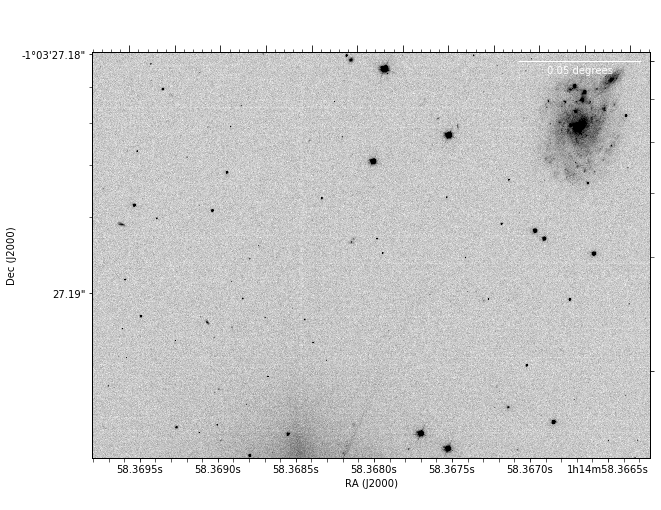

In [27]:
full = fits.open('frame-g-004858-1-0480.fits')
wcs = WCS('frame-g-004858-1-0480.fits')
apfig = aplpy.FITSFigure(full)
apfig.show_grayscale()
apfig.add_scalebar(0.05, "0.05 degrees", color='white', corner='top right')
apfig.set_theme('publication')
apfig.tick_labels.set_xformat('hh:mm:ss.ssss') #ddd.dddddd')
apfig.tick_labels.set_yformat('dd:mm:ss.ss') #ddd.dddddd')
apfig.ticks.show()
#apfig.ticks.set_xspacing(0.05)
apfig.tick_labels.show()
#apfig.add_grid()

Cutout NGC450

1489


(1200, 2048)

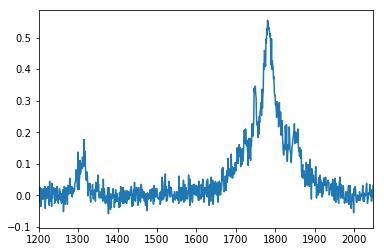

In [61]:
print(len(full[0].data))
y=full[0].data[1200]
x=np.arange(0,len(y),1)
plt.plot(x, y)
plt.xlim([1200,len(y)])




Run Galfit on the image with one Sersic profile and then two Sersic profiles